# Final Project

Installation and Setup Matplotlib

In [69]:
import numpy as np
import sep

In [70]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

Download the FITS file used in tutorial

In [71]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('/Users/mohanduvvuri/Desktop/ASTR19/image.fits')

Use astropy.io.fits.info() to display the structure of the file

In [72]:
fits.info(image_file)


Filename: /Users/mohanduvvuri/Desktop/ASTR19/image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     337   (256, 256)   int16 (rescales to float32)   


Here, we use astropy.io.fits.getdata() to read the image data from this first extension using the keyword argument ext=0:

In [73]:
image_data = fits.getdata(image_file, ext=0)

The data is now stored as a 2D numpy array. Print the dimensions using the shape attribute:

In [74]:
print(image_data.shape)

(256, 256)


Display the image data and save figure

/var/folders/fd/q_n0y6315tl1pmd8l6s6m3480000gn/T/ipykernel_34410/3111382887.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


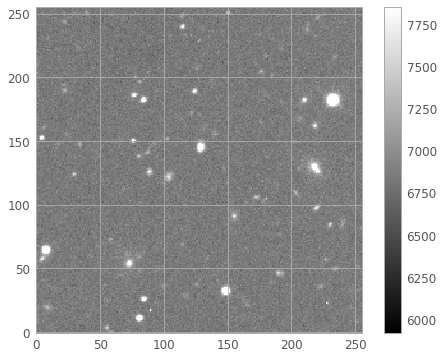

In [75]:
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig("figure1.png")

Background Subtraction

Measure a spatially varying background on the image

In [76]:
bkg = sep.Background(image_data)

Get a "global" mean and noise of the image background:

In [77]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


Evaluate background as 2-d array, same size as original image

In [78]:
bkg_image = bkg.back()

Show the background

/var/folders/fd/q_n0y6315tl1pmd8l6s6m3480000gn/T/ipykernel_34410/62763727.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


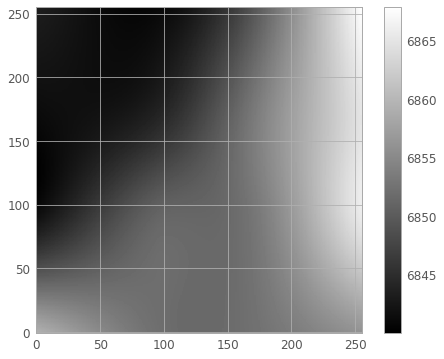

In [79]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("figure2.png")

Evaluate the background noise as 2-d array, same size as original image


In [80]:
bkg_rms = bkg.rms()

Show the background noise


/var/folders/fd/q_n0y6315tl1pmd8l6s6m3480000gn/T/ipykernel_34410/2577702335.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


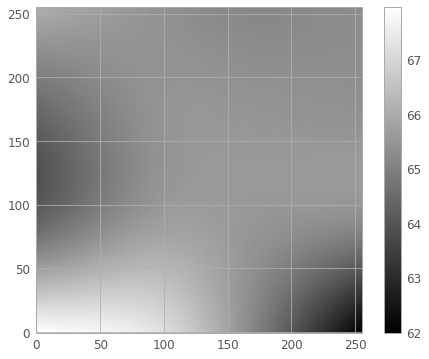

In [81]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("figure3.png")

Subtract the background

In [82]:
data_sub = image_data - bkg

Object Detection

here we’re setting the detection threshold to be a constant value of 1.5σ where σ is the global background RMS

In [83]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

how many objects were detected


In [84]:
len(objects)

68

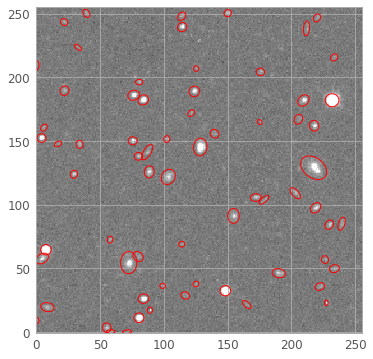

In [85]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("figure4.png")

available fields

In [86]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [87]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
